In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
data = pd.read_csv('Documents/columbia/APAN005/PAC PROJECT/analysis_data.csv')

In [2]:
data.columns

Index(['customer_id', 'age', 'gender', 'marital_status', 'education_level',
       'region', 'employment_status', 'owns_home', 'has_auto_loan',
       'annual_income', 'credit_score', 'credit_limit', 'tenure', 'card_type',
       'num_transactions', 'avg_transaction_value', 'online_shopping_freq',
       'reward_points_balance', 'travel_frequency', 'utility_payment_count',
       'num_children', 'num_credit_cards', 'monthly_spend'],
      dtype='object')

In [3]:
data.describe()

,customer_id,age,owns_home,has_auto_loan,annual_income,credit_score,credit_limit,tenure,num_transactions,avg_transaction_value,online_shopping_freq,reward_points_balance,travel_frequency,utility_payment_count,num_children,num_credit_cards,monthly_spend
count,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,37992.000000,40000.000000,40000.000000,39202.000000,40000.000000,40000.00000,40000.000000
mean,5.516258e+07,49.063900,0.502825,0.502925,62466.009961,699.878580,14573.193459,9.514575,11.275000,37.433152,8.111866,7250.912784,2.870675,3.250446,1.109100,7.98765,1666.201508
std,2.595662e+07,18.175343,0.499998,0.499998,49656.884438,50.247404,11791.285872,5.780889,6.038422,20.037322,3.809252,4975.085861,2.258988,2.061360,1.152771,0.19621,537.303898
min,1.000088e+07,18.000000,0.000000,0.000000,2277.888686,470.895415,461.048761,0.000000,0.000000,4.417843,0.000000,571.531405,0.000000,0.000000,0.000000,1.00000,99.080000
25%,3.261957e+07,33.000000,0.000000,0.000000,30478.024000,665.682600,7007.302229,5.000000,7.000000,23.612979,5.000000,4053.616363,1.000000,2.000000,0.000000,8.00000,1309.502500
50%,5.541669e+07,49.000000,1.000000,1.000000,48800.257192,700.208341,11281.194224,10.000000,10.000000,32.983460,8.000000,5894.362787,2.000000,3.000000,1.000000,8.00000,1609.915000
75%,7.758322e+07,65.000000,1.000000,1.000000,78217.444607,733.811768,18282.105567,15.000000,14.000000,46.329229,10.000000,8827.159632,4.000000,4.000000,2.000000,8.00000,1953.395000
max,9.999871e+07,80.000000,1.000000,1.000000,720441.690363,850.000000,191517.788605,19.000000,80.000000,240.927091,45.000000,73100.957960,29.000000,20.000000,6.000000,8.00000,8924.360000


In [4]:
#Check for NaNs

In [5]:
data.isnull().sum()

customer_id                 0
age                         0
gender                      0
marital_status              0
education_level          1199
region                      0
employment_status           0
owns_home                   0
has_auto_loan               0
annual_income               0
credit_score                0
credit_limit                0
tenure                      0
card_type                   0
num_transactions            0
avg_transaction_value       0
online_shopping_freq     2008
reward_points_balance       0
travel_frequency            0
utility_payment_count     798
num_children                0
num_credit_cards            0
monthly_spend               0
dtype: int64

In [6]:
#Remove NaNs with function below

In [7]:
data = data.fillna(0) # replace NaNs to 0

In [8]:
#Confirm NaNs were replaced to 0

In [9]:
data.isnull().sum()

customer_id              0
age                      0
gender                   0
marital_status           0
education_level          0
region                   0
employment_status        0
owns_home                0
has_auto_loan            0
annual_income            0
credit_score             0
credit_limit             0
tenure                   0
card_type                0
num_transactions         0
avg_transaction_value    0
online_shopping_freq     0
reward_points_balance    0
travel_frequency         0
utility_payment_count    0
num_children             0
num_credit_cards         0
monthly_spend            0
dtype: int64

In [10]:
data.dtypes

customer_id                int64
age                        int64
gender                    object
marital_status            object
education_level           object
region                    object
employment_status         object
owns_home                  int64
has_auto_loan              int64
annual_income            float64
credit_score             float64
credit_limit             float64
tenure                     int64
card_type                 object
num_transactions           int64
avg_transaction_value    float64
online_shopping_freq     float64
reward_points_balance    float64
travel_frequency           int64
utility_payment_count    float64
num_children               int64
num_credit_cards           int64
monthly_spend            float64
dtype: object

In [11]:
y = data.monthly_spend
X = data.drop('monthly_spend', axis=1)

In [12]:
X

,customer_id,age,gender,marital_status,education_level,region,employment_status,owns_home,has_auto_loan,annual_income,...,tenure,card_type,num_transactions,avg_transaction_value,online_shopping_freq,reward_points_balance,travel_frequency,utility_payment_count,num_children,num_credit_cards
0,75570383,77,female,married,high school,northeast,unemployed,1,0,56000.116893,...,4,standard,14,46.144967,8.0,6325.578928,3,3.0,1,8
1,77915507,52,male,married,high school,south,unemployed,1,1,39432.589311,...,18,gold,13,88.532219,7.0,5586.814175,1,1.0,2,8
2,31958910,48,female,married,bachelors,west,unemployed,1,1,51020.949673,...,16,standard,9,78.304445,4.0,6250.225115,3,2.0,0,8
3,76868487,67,female,married,high school,northeast,unemployed,1,0,76794.566399,...,2,standard,10,54.932667,7.0,8875.409103,3,3.0,2,8
4,69435006,21,female,single,bachelors,west,self-employed,1,1,44386.444631,...,6,standard,8,18.866712,6.0,5318.021523,4,3.0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,61684274,76,female,married,bachelors,northeast,unemployed,1,0,24416.053251,...,7,standard,12,20.020860,6.0,3566.432517,3,1.0,2,8
39996,79543996,35,female,single,bachelors,northeast,student,1,0,117569.490084,...,15,gold,18,23.743410,9.0,13504.349780,2,4.0,0,8
39997,70938074,70,male,married,high school,west,unemployed,1,1,54612.784494,...,6,standard,12,71.729568,6.0,6598.036278,0,4.0,1,8
39998,87140605,59,female,married,bachelors,west,unemployed,1,1,25765.665770,...,14,standard,11,36.541350,4.0,3963.839009,1,2.0,1,8


In [13]:
#Convert Data Types 'Object' to 'Values'

In [14]:
categorical_features = ['gender','marital_status','education_level','region','employment_status','card_type']

X = pd.get_dummies(X, 
                         prefix_sep = '_', 
                         columns = categorical_features, 
                         drop_first = True)

X.reindex(columns=X.columns, fill_value=0)
X.head()

,customer_id,age,owns_home,has_auto_loan,annual_income,credit_score,credit_limit,tenure,num_transactions,avg_transaction_value,...,education_level_graduate,education_level_high school,region_northeast,region_south,region_west,employment_status_self-employed,employment_status_student,employment_status_unemployed,card_type_platinum,card_type_standard
0,75570383,77,1,0,56000.116893,636.767610,10530.389617,4,14,46.144967,...,False,True,True,False,False,False,False,True,False,True
1,77915507,52,1,1,39432.589311,739.726869,8509.061360,18,13,88.532219,...,False,True,False,True,False,False,False,True,False,False
2,31958910,48,1,1,51020.949673,650.995903,12462.743330,16,9,78.304445,...,False,False,False,False,True,False,False,True,False,True
3,76868487,67,1,0,76794.566399,612.779395,17750.953577,2,10,54.932667,...,False,True,True,False,False,False,False,True,False,True
4,69435006,21,1,1,44386.444631,714.429605,9861.651561,6,8,18.866712,...,False,False,False,False,True,True,False,False,False,True


In [23]:
#Random Forest
#with tree estimator

In [24]:
%%time
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=200, 
                                n_jobs = -1,
                                oob_score=True,
                                random_state=1031)
forest.fit(X, y)

CPU times: user 1min 35s, sys: 752 ms, total: 1min 36s
Wall time: 1min 27s


RandomForestRegressor(n_estimators=200, n_jobs=-1, oob_score=True,
                      random_state=1031)

In [25]:
pred_train_forest = forest.predict(X)

In [26]:
print('Train RMSE: ', root_mean_squared_error(y, pred_train_forest))

Train RMSE:  101.71291813669723


In [27]:
#Feature Importance

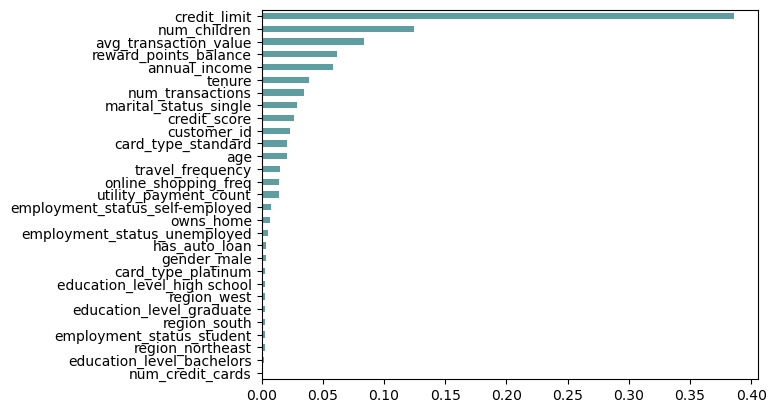

In [28]:
pd.Series(forest.feature_importances_, index=X.columns)\
.sort_values(ascending=True)\
.plot(kind = 'barh', color = 'cadetblue')
plt.show()

In [44]:
# Test the model on new unseen data.
scoring_data = pd.read_csv('Documents/columbia/APAN005/PAC PROJECT/scoring_data.csv')
scoring_data_X = scoring_data

In [45]:
scoring_data.isnull().sum()

customer_id                0
age                        0
gender                     0
marital_status             0
education_level          301
region                     0
employment_status          0
owns_home                  0
has_auto_loan              0
annual_income              0
credit_score               0
credit_limit               0
tenure                     0
card_type                  0
num_transactions           0
avg_transaction_value      0
online_shopping_freq     492
reward_points_balance      0
travel_frequency           0
utility_payment_count    202
num_children               0
num_credit_cards           0
dtype: int64

In [46]:
scoring_data = scoring_data.fillna(0)

In [47]:
scoring_data.isnull().sum()

customer_id              0
age                      0
gender                   0
marital_status           0
education_level          0
region                   0
employment_status        0
owns_home                0
has_auto_loan            0
annual_income            0
credit_score             0
credit_limit             0
tenure                   0
card_type                0
num_transactions         0
avg_transaction_value    0
online_shopping_freq     0
reward_points_balance    0
travel_frequency         0
utility_payment_count    0
num_children             0
num_credit_cards         0
dtype: int64

In [48]:
scoring_data.dtypes

customer_id                int64
age                        int64
gender                    object
marital_status            object
education_level           object
region                    object
employment_status         object
owns_home                  int64
has_auto_loan              int64
annual_income            float64
credit_score             float64
credit_limit             float64
tenure                     int64
card_type                 object
num_transactions           int64
avg_transaction_value    float64
online_shopping_freq     float64
reward_points_balance    float64
travel_frequency           int64
utility_payment_count    float64
num_children               int64
num_credit_cards           int64
dtype: object

In [49]:
scoring_data_X = scoring_data

In [50]:
categorical_features = ['gender','marital_status','education_level','region','employment_status','card_type']

scoring_data_X = pd.get_dummies(scoring_data_X, 
                         prefix_sep = '_', 
                         columns = categorical_features, 
                         drop_first = True)

scoring_data_X.reindex(columns=scoring_data_X.columns, fill_value=0)
scoring_data_X.head()

,customer_id,age,owns_home,has_auto_loan,annual_income,credit_score,credit_limit,tenure,num_transactions,avg_transaction_value,...,education_level_graduate,education_level_high school,region_northeast,region_south,region_west,employment_status_self-employed,employment_status_student,employment_status_unemployed,card_type_platinum,card_type_standard
0,20451981,68,1,0,28736.958529,644.592407,6295.525826,17,6,32.444032,...,False,False,False,False,True,True,False,False,False,True
1,23251656,37,0,1,177014.762457,683.032163,39234.812959,14,17,30.655429,...,False,True,True,False,False,False,True,False,True,False
2,64082260,65,0,0,51625.522861,692.072705,10842.809736,1,9,36.063881,...,False,False,True,False,False,True,False,False,False,True
3,82505923,33,0,1,62667.564975,735.600403,14833.580687,2,12,28.833727,...,False,False,True,False,False,True,False,False,False,False
4,89981994,23,1,0,84996.492293,732.301374,21540.005940,7,15,12.361809,...,False,False,False,False,False,True,False,False,False,False


In [51]:
test_pred = forest.predict(scoring_data_X)

In [52]:
test_pred

array([1729.33095, 2755.1481 , 1488.76635, ..., 1415.8254 , 1312.10865,
       1813.35335])

In [53]:
submission_file = pd.DataFrame({'customer_id': scoring_data.customer_id, 'monthly_spend': test_pred})
submission_file.to_csv('submission_file_22.csv',index = False) 